## Business Question

We have data about all users who hit an e-commerce site: whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are repeat users and the number of pages visited during that session (as a proxy for site activity/time spent on site).

Our goal is to predict conversion rate via a machine learning model (with the end-to-end model pipeline), and come up with recommendations for the product and marketing teams to improve user conversion rate. 

## Outline of notebook

    1. Explorative Data Analysis and Data Visualization

    2. Feature Engineering and Feature Selection 
    
    3. Modeling (Random Forest Classifier)

    4. Model Evaluation

    5. Business Recommendation



## Explorative Data Analysis, Data Preprocessing, Data Visualization

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv("---/conversion.csv")

In [5]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


The dataset contains information about features like country, age, new_user, source of user, and total number of pages visited, as well as conversion. 

In [7]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [55]:
# percentages of users from different countries 

print(data['country'].value_counts(normalize=True) * 100)


country
US         56.322937
China      24.225960
UK         15.322361
Germany     4.128742
Name: proportion, dtype: float64


In [56]:
# current conversion rate

print(data['converted'].value_counts(normalize=True) * 100)

converted
0    96.774806
1     3.225194
Name: proportion, dtype: float64


In [57]:
# percentages of users from different sources

print(data['source'].value_counts(normalize=True) * 100)

source
Seo       49.032252
Ads       28.064377
Direct    22.903371
Name: proportion, dtype: float64


In [58]:
# percentages of users with different levels of use 

print(data['total_pages_visited'].value_counts(normalize=True) * 100)

total_pages_visited
2     13.873586
3     13.861251
4     12.981107
1     12.884016
5     11.482679
6      9.570269
7      7.428257
8      5.541465
9      3.844743
10     2.553147
11     1.705893
12     1.143271
13     0.766925
14     0.572742
15     0.418725
16     0.347883
17     0.267238
18     0.228338
19     0.178686
20     0.128084
21     0.093612
22     0.056926
23     0.035737
24     0.014548
25     0.012334
26     0.005376
27     0.002214
29     0.000633
28     0.000316
Name: proportion, dtype: float64


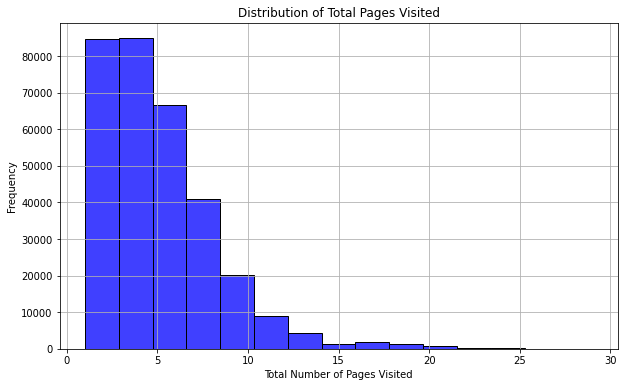

In [16]:
# plot the distribution of the total number of pages visited

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data["total_pages_visited"], bins=15, kde=False, color='blue')
plt.xlabel("Total Number of Pages Visited")
plt.ylabel("Frequency")
plt.title("Distribution of Total Pages Visited")
plt.grid(True)
plt.show()

In [21]:
# removing unreasonable outliers in data

data = data[data['age'] < 100]

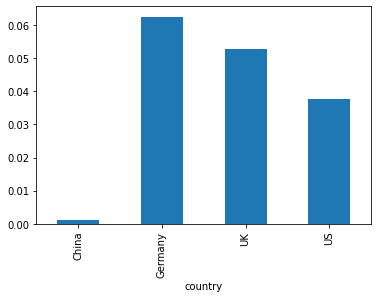

In [22]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
#rcParams.update({'figure.autolayout': True})
  
data.groupby(['country'])['converted'].mean().plot.bar()
plt.show()

In [23]:
data.groupby(['country'])['converted'].mean()

country
China      0.001332
Germany    0.062428
UK         0.052612
US         0.037801
Name: converted, dtype: float64

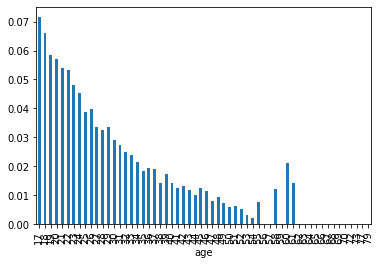

In [24]:
data.groupby(['age'])['converted'].mean().plot.bar()
plt.show()

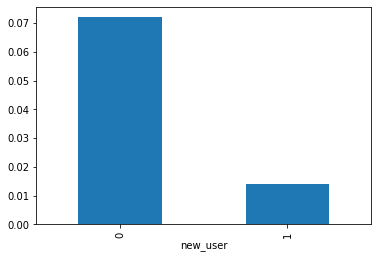

In [25]:
data.groupby(['new_user'])['converted'].mean().plot.bar()
plt.show()

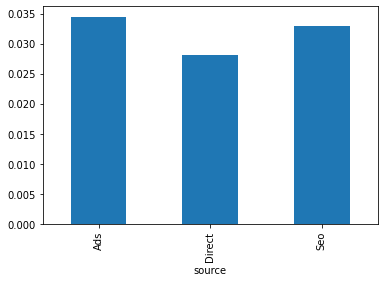

In [26]:
data.groupby(['source'])['converted'].mean().plot.bar()
plt.show()

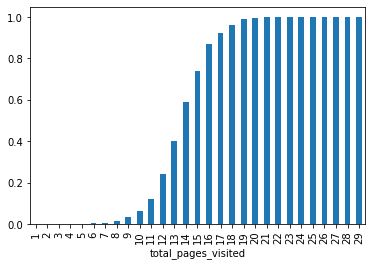

In [27]:
data.groupby(['total_pages_visited'])['converted'].mean().plot.bar()
plt.show()

In [38]:
# deal with columns with categorical data

data_dummy = pd.get_dummies(data, drop_first=False).astype(int)

In [39]:
data_dummy.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


## Feature Engineering, Feature Selection, Modeling, Model Evaluation

In [40]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
np.random.seed(4684)

In [42]:
#split into train and test to avoid overfitting
train, test = train_test_split(data_dummy, test_size = 0.34)

In [43]:
#build the model
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True)
rf.fit(train.drop('converted', axis=1), train['converted'])

RandomForestClassifier(max_features=3, oob_score=True)

In [44]:
# Model evaluation --- let's print OOB accuracy and confusion matrix

print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(train['converted'], rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

OOB accuracy is 0.9838420623891897 
 OOB Confusion Matrix 
         0     1
0  200872  1102
1    2270  4446


In [45]:
print(
"Test accuracy is", rf.score(test.drop('converted', axis=1),test['converted']), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(test['converted'], rf.predict(test.drop('converted', axis=1)), labels=[0, 1]))
)

Test accuracy is 0.9846430033113814 
 Test Set Confusion Matrix 
         0     1
0  103480   546
1    1105  2377


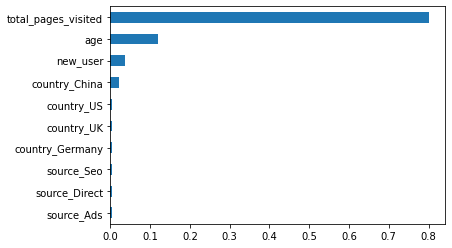

In [46]:
#checking feature importances
feat_importances = pd.Series(rf.feature_importances_, index=train.drop('converted', axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

In [48]:
#build the model without total_pages_visited
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True, class_weight={0:1, 1:10})
rf.fit(train.drop(['converted', 'total_pages_visited'], axis=1), train['converted'])
  
#let's print OOB accuracy and confusion matrix
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(train['converted'], rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

OOB accuracy is 0.8903253629785807 
 OOB Confusion Matrix 
         0      1
0  182889  19085
1    3803   2913


In [49]:
#and let's print test accuracy and confusion matrix
print(
"Test accuracy is", rf.score(test.drop(['converted', 'total_pages_visited'], axis=1),test['converted']), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(test['converted'], rf.predict(test.drop(['converted', 'total_pages_visited'], axis=1)), labels=[0, 1]))
)

Test accuracy is 0.8917940990437921 
 Test Set Confusion Matrix 
        0     1
0  94358  9668
1   1965  1517


Studying feature importances

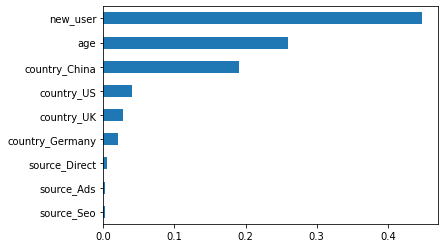

In [50]:
feat_importances = pd.Series(rf.feature_importances_, index=train.drop(['converted', 'total_pages_visited'], axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

## Business Recommendation

1. The site is working very well for young users. The marketing team can advertise and use channels which are more likely to reach young people.

2. The site is working poorly for older users. The product team can go through the UI and figure out the pain points of older users. The marketing team can explore channels that older people are more likely to use. 

3. Users with old accounts are more likely to be converted than new users. Targeted emails with offers to bring them back to the site could be a good idea to try.

4. The site is working very well for Germany users in terms of conversion, but the percentage of users from Germany is very low: way lower than UK, despite a larger population. The marketing team can target Germans more as that represents a great opportunity. 

5. Something is wrong with the Chinese version of the site, as there are many users from China but very few of them are being converted. It is either poorly translated, doesn’t fit the local culture, or involves some technical issues. Given how many users are based in China, fixing this should be a top priority for the product and marketing teams.
